In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/김민')
print(os.getcwd())

/content/drive/MyDrive/김민


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('sample_submission.csv')

# EDA

In [ ]:
train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_1,0,15.4140,-2.1016,10.4773,4.8941,12.6506,-3.7205,5.1426,17.7048,...,-2.8810,8.1647,1.0927,2.1215,17.6536,3.2253,-2.1234,8.9516,13.3485,-16.0178
1,train_2,0,12.3576,-8.1666,11.7785,2.8869,12.3183,-6.9847,4.2671,9.6710,...,0.2397,8.1569,-1.0753,5.4679,23.6376,-0.5022,9.2414,8.2427,10.7546,-3.4394
2,train_3,0,9.4142,-8.6132,7.2196,3.2496,10.6550,-3.3245,5.1010,18.5389,...,8.1638,9.2399,1.0160,7.4548,17.0933,0.0715,-4.0455,9.4586,17.8789,-13.9784
3,train_4,0,13.0647,-0.7917,13.0270,8.7865,10.2252,-2.9311,6.7299,11.8682,...,9.3914,7.5576,0.4784,1.2138,19.0498,-1.5634,7.3092,8.4344,18.1104,-7.7668
4,train_5,0,9.5222,-0.2727,8.2173,8.4071,12.7732,-10.3113,4.7486,13.7810,...,8.4802,0.9951,3.9973,1.9370,24.4786,-2.0294,-0.5454,8.7461,21.3832,14.1786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,train_159996,0,8.0801,-2.5523,10.6587,10.6660,8.7552,-10.8144,5.2019,21.1479,...,4.9773,7.5440,0.8520,4.9402,19.0033,1.5157,-9.3063,9.0586,14.9677,-11.2478
159996,train_159997,0,11.8371,-4.9598,12.9172,9.3759,13.0622,2.6849,5.2963,19.8298,...,2.3344,13.5478,3.1656,-1.5778,17.3154,-0.9673,4.9180,8.8015,13.2019,-21.5102
159997,train_159998,0,11.3368,1.2790,14.1568,11.9850,11.4859,0.2191,5.9112,19.7031,...,5.7440,11.3343,2.8999,4.8399,14.0429,0.5310,-0.0909,6.7786,13.0894,-0.6329
159998,train_159999,0,3.4660,-0.2570,4.3530,7.2045,11.4988,-7.0838,5.5081,13.7160,...,2.3471,2.6189,4.6409,9.0566,15.5558,-0.0071,1.0802,9.6420,14.3480,4.5444


In [ ]:
test

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_1,8.7757,6.7905,9.2920,4.8443,10.8877,3.5858,4.7267,14.1264,1.9131,...,4.8996,4.4960,2.0201,5.0578,18.7864,-0.2550,4.0958,7.9291,17.6055,-7.4019
1,test_2,7.5491,-8.4764,15.4626,3.6803,12.1527,-7.1858,5.1952,13.7568,2.5632,...,10.2822,11.9053,3.0869,-0.6879,22.3453,-2.1595,4.1147,9.2685,12.2069,1.3086
2,test_3,5.8385,-6.9177,8.1589,6.7591,9.0635,4.9003,4.7126,21.1854,-3.5385,...,0.0732,10.2627,-0.3105,6.8481,15.2119,-0.5050,1.8873,8.6977,18.6569,11.5001
3,test_4,15.6901,-7.7904,8.3676,6.3246,9.8144,6.9361,4.5284,11.7888,3.3775,...,11.8331,4.3828,2.9730,2.4989,18.6336,1.0621,-3.8953,8.7950,12.9313,-3.1393
4,test_5,15.5726,-6.6387,12.0251,7.2093,10.3838,-8.9961,4.8868,18.8259,-5.2734,...,7.9042,10.4118,3.3438,0.4358,16.0511,0.7758,-3.3334,7.7918,18.2619,-3.2074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,test_39996,13.9605,1.6317,16.5365,5.5922,12.2347,-14.3060,5.0389,18.4215,4.0158,...,-1.3783,8.9957,2.2425,9.3388,14.8871,0.8290,-1.0208,8.3668,16.5769,2.4484
39996,test_39997,7.4985,4.7339,11.9952,6.2574,9.8171,4.6362,4.6372,13.3072,-0.5075,...,5.5200,9.0240,2.1368,4.9087,16.1938,0.5539,6.7445,10.1029,20.6326,-19.7800
39997,test_39998,4.5195,3.8886,7.4813,8.1466,11.8629,-4.4444,5.1001,23.0027,-3.2955,...,7.0380,3.5980,1.9735,3.4259,15.9605,1.0190,3.0311,6.7328,15.8304,-2.2132
39998,test_39999,8.8422,3.3068,8.3702,9.4941,11.5611,13.2109,5.3921,11.9120,-2.1810,...,7.4395,10.4932,3.7310,11.7952,17.9021,-1.4007,-6.2355,9.4922,14.9396,-9.6255


## 자료형, 결측치 확인

In [ ]:
train.iloc[:, 2:].dtypes.to_frame()

,0
var_0,float64
var_1,float64
var_2,float64
var_3,float64
var_4,float64
...,...
var_195,float64
var_196,float64
var_197,float64
var_198,float64


In [ ]:
(train.iloc[:, 2:].dtypes.to_frame()[0] != 'float64').sum() #전부 실수 자료형

0

In [ ]:
(train.isnull().sum().to_frame()[0] != 0).sum() #결측치 없음

0

## 클래스 분포 확인

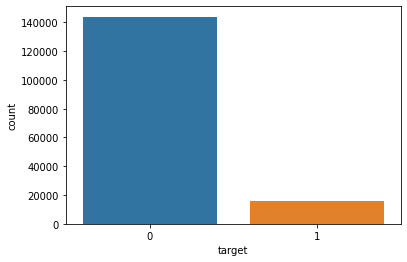

In [ ]:
sns.countplot(x=train["target"])

**학습 데이터 튜닝할 수 있는 것들**
*   변수 선택 (다중공선성 확인, RFE(기여도 평가), ..., sklearn.feature_selection 참고)
*   차원 축소 (PCA...)
*   이상치 제거
*   스케일링 (standard, min-max)
*   1 클래스 오버샘플링







## 다중공선성 확인

In [ ]:
cor = train.iloc[:, 2:].corr(method='pearson')

In [ ]:
cor

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000559,0.007321,0.002932,0.001962,0.003295,0.008307,0.003977,0.004844,-0.003292,...,0.003146,-0.001350,-0.005660,0.001998,-0.001171,0.003069,0.002994,0.000280,-0.006417,0.004521
var_1,-0.000559,1.000000,0.002315,-0.000300,0.001666,-0.001972,0.003497,0.001942,0.003051,0.000679,...,0.006600,0.004654,-0.002037,0.003053,-0.003123,-0.001330,-0.001850,-0.004629,-0.004056,0.003498
var_2,0.007321,0.002315,1.000000,0.001378,-0.001255,0.000832,0.000942,-0.001758,0.003367,-0.002768,...,0.001346,0.002456,-0.005172,0.002999,0.001530,0.000184,0.002625,0.001264,-0.000963,0.002817
var_3,0.002932,-0.000300,0.001378,1.000000,-0.002620,0.002915,-0.000805,0.002178,0.003823,-0.000224,...,0.000626,0.001575,-0.000235,0.000043,-0.000829,-0.000342,0.000125,0.003196,-0.002391,0.000700
var_4,0.001962,0.001666,-0.001255,-0.002620,1.000000,-0.001618,-0.001574,0.004045,0.000595,-0.000621,...,0.001688,0.003669,0.001820,0.003004,0.000158,0.003250,0.001603,-0.000120,0.001018,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.003069,-0.001330,0.000184,-0.000342,0.003250,-0.001976,0.002916,0.000777,0.001061,-0.001420,...,0.006556,0.000983,-0.004750,-0.001112,0.000633,1.000000,0.000898,-0.004906,-0.000632,0.002638
var_196,0.002994,-0.001850,0.002625,0.000125,0.001603,0.001158,0.003162,0.001140,-0.004568,0.002482,...,-0.000461,0.001765,-0.000254,-0.003138,-0.006041,0.000898,1.000000,-0.000740,-0.000459,-0.000816
var_197,0.000280,-0.004629,0.001264,0.003196,-0.000120,-0.001028,-0.002307,0.003232,-0.005545,0.003597,...,-0.006463,0.002144,-0.000512,0.003517,-0.001147,-0.004906,-0.000740,1.000000,0.000397,0.004093
var_198,-0.006417,-0.004056,-0.000963,-0.002391,0.001018,-0.000271,-0.002444,0.000370,0.001771,0.001856,...,-0.001974,0.000284,0.002150,0.000760,0.003176,-0.000632,-0.000459,0.000397,1.000000,-0.006485


(-0.1, 0.1)

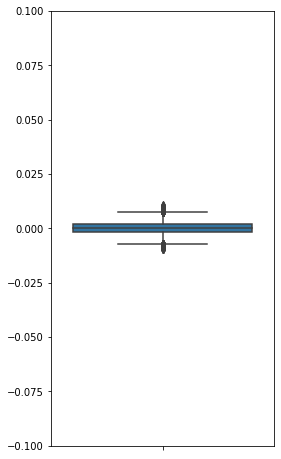

In [ ]:
plt.figure(figsize=(4,8))
sns.boxplot(y=cor.values)
plt.ylim((-0.1, 0.1))

피처 간 선형 상관관계는 거의 없는 것 같음

## 이상치 제거



In [ ]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,...,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,0.100487,10.686423,-1.635005,10.717822,6.798371,11.078359,-5.063101,5.411429,16.546195,0.278720,...,3.231118,7.437430,1.926908,3.331891,17.981283,-0.137477,2.301247,8.908436,15.870663,-3.322579
std,0.300650,3.039724,4.048365,2.646578,2.041822,1.623850,7.878059,0.867974,3.418934,3.332611,...,4.563838,3.024263,1.476769,3.993505,3.133260,1.430700,5.450803,0.921079,3.013206,10.430896
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.749400,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.460400,-4.747125,8.722075,5.258000,9.880675,-11.218200,4.769400,13.947575,-2.323225,...,-0.069275,5.157400,0.891100,0.580475,15.620400,-1.165900,-1.942200,8.254300,13.828400,-11.187300
50%,0.000000,10.529800,-1.623700,10.581400,6.829450,11.109900,-4.826700,5.387400,16.460200,0.386900,...,3.197700,7.348050,1.900850,3.397150,17.944900,-0.168900,2.414100,8.888700,15.932150,-2.825700
75%,0.000000,12.764525,1.349175,12.521625,8.321900,12.261800,0.940175,6.006400,19.102825,2.933650,...,6.411450,9.512525,2.945000,6.209025,20.378600,0.833900,6.552475,9.593500,18.063050,4.821300
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.342300,16.716500,8.402400,17.908600,27.928800,4.272900,17.684100,12.000400,26.079100,28.500700


In [ ]:
def rm_outlier(df, rm_col):
    dff = df

    for c in rm_col:
        firstq = dff[c].quantile(0.25)
        thirdq = dff[c].quantile(0.75)
        iqr = thirdq - firstq

        dff = dff[(dff[c] <= thirdq + 1.5*iqr) & (dff[c] >= firstq - 1.5*iqr)]
        dff.reset_index(drop=True, inplace=True)

    return dff

In [ ]:
cols = train.iloc[:, 2:].columns
print(cols)

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)


In [ ]:
rmout_train = rm_outlier(train, cols)

In [ ]:
rmout_train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_1,0,15.4140,-2.1016,10.4773,4.8941,12.6506,-3.7205,5.1426,17.7048,...,-2.8810,8.1647,1.0927,2.1215,17.6536,3.2253,-2.1234,8.9516,13.3485,-16.0178
1,train_2,0,12.3576,-8.1666,11.7785,2.8869,12.3183,-6.9847,4.2671,9.6710,...,0.2397,8.1569,-1.0753,5.4679,23.6376,-0.5022,9.2414,8.2427,10.7546,-3.4394
2,train_3,0,9.4142,-8.6132,7.2196,3.2496,10.6550,-3.3245,5.1010,18.5389,...,8.1638,9.2399,1.0160,7.4548,17.0933,0.0715,-4.0455,9.4586,17.8789,-13.9784
3,train_4,0,13.0647,-0.7917,13.0270,8.7865,10.2252,-2.9311,6.7299,11.8682,...,9.3914,7.5576,0.4784,1.2138,19.0498,-1.5634,7.3092,8.4344,18.1104,-7.7668
4,train_5,0,9.5222,-0.2727,8.2173,8.4071,12.7732,-10.3113,4.7486,13.7810,...,8.4802,0.9951,3.9973,1.9370,24.4786,-2.0294,-0.5454,8.7461,21.3832,14.1786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140017,train_159996,0,8.0801,-2.5523,10.6587,10.6660,8.7552,-10.8144,5.2019,21.1479,...,4.9773,7.5440,0.8520,4.9402,19.0033,1.5157,-9.3063,9.0586,14.9677,-11.2478
140018,train_159997,0,11.8371,-4.9598,12.9172,9.3759,13.0622,2.6849,5.2963,19.8298,...,2.3344,13.5478,3.1656,-1.5778,17.3154,-0.9673,4.9180,8.8015,13.2019,-21.5102
140019,train_159998,0,11.3368,1.2790,14.1568,11.9850,11.4859,0.2191,5.9112,19.7031,...,5.7440,11.3343,2.8999,4.8399,14.0429,0.5310,-0.0909,6.7786,13.0894,-0.6329
140020,train_159999,0,3.4660,-0.2570,4.3530,7.2045,11.4988,-7.0838,5.5081,13.7160,...,2.3471,2.6189,4.6409,9.0566,15.5558,-0.0071,1.0802,9.6420,14.3480,4.5444


In [ ]:
rmout_train.to_csv('rmout_train.csv', index=False)

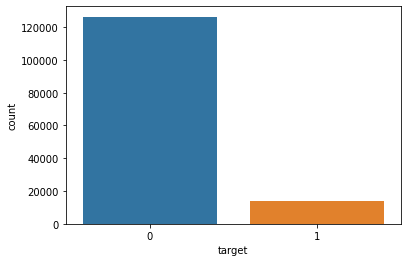

In [ ]:
sns.countplot(x=rmout_train["target"])

## smote 데이터 증강

In [ ]:
x = train.drop(['ID_code', 'target'], axis=1)
y = train['target']

In [ ]:
test = test.drop('ID_code', axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
xsc = scaler.transform(x)
testsc = scaler.transform(test)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 0.2, random_state=42) #0클래스:1클래스 = 10:3 비율

x_aug, y_aug = sm.fit_resample(xsc, list(y))

print('After OverSampling, the shape of train_X: {}'.format(x_aug.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(len(y_aug)))

After OverSampling, the shape of train_X: (172706, 200)
After OverSampling, the shape of train_y: 172706 



In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

x_smund, y_smund = RandomUnderSampler(sampling_strategy=0.3, random_state=42).fit_resample(x_aug, y_aug)

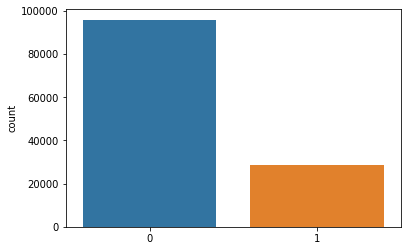

In [ ]:
sns.countplot(x=y_smund)

In [ ]:
len(y_smund)

124730

In [ ]:
with open('x_mm_aug.pkl', 'wb') as f:
    pickle.dump(x_aug, f)

with open('y_mm_aug.pkl', 'wb') as f:
    pickle.dump(y_aug, f)

with open('test_mm_foraug.pkl', 'wb') as f:
    pickle.dump(testsc, f)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 0.7, random_state=42) #0클래스:1클래스 = 10:7 비율

x_aug2, y_aug2 = sm.fit_resample(xsc, list(y))

print('After OverSampling, the shape of train_X: {}'.format(x_aug2.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(len(y_aug2))

After OverSampling, the shape of train_X: (244667, 200)
After OverSampling, the shape of train_y: (244667, 200) 



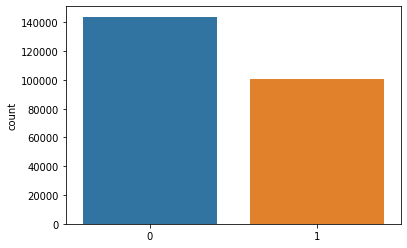

In [ ]:
sns.countplot(x=y_aug2)

## 랜덤언더샘플링

In [ ]:
x = train.drop(['ID_code', 'target'], axis=1)
y = train['target']

In [ ]:
test = test.drop('ID_code', axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
xsc = scaler.transform(x)
testsc = scaler.transform(test)

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

x_und, y_und = RandomUnderSampler(sampling_strategy=0.2, random_state=42).fit_resample(xsc, y)

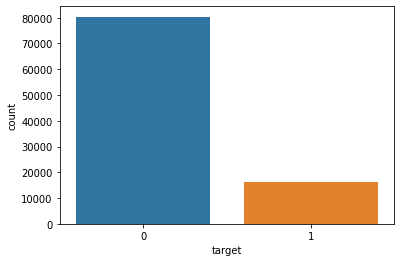

In [ ]:
sns.countplot(x=y_und)

In [ ]:
len(x_und), len(y_und)

(96468, 96468)

## 랜덤오버샘플링

In [ ]:
x = train.drop(['ID_code', 'target'], axis=1)
y = train['target']

In [ ]:
test = test.drop('ID_code', axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
xsc = scaler.transform(x)
testsc = scaler.transform(test)

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

x_over, y_over = RandomOverSampler(sampling_strategy=0.3, random_state=42).fit_resample(xsc, y)

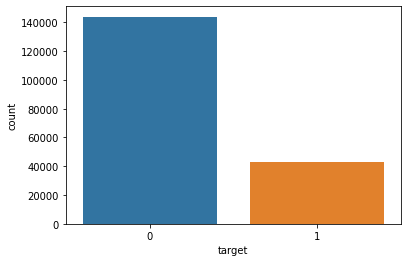

In [ ]:
sns.countplot(x=y_over)

In [ ]:
len(x_over), len(y_over)

(187098, 187098)

## 랜덤오버+랜덤언더

In [ ]:
x = train.drop(['ID_code', 'target'], axis=1)
y = train['target']

In [ ]:
test = test.drop('ID_code', axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
xsc = scaler.transform(x)
testsc = scaler.transform(test)

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

x_over, y_over = RandomOverSampler(sampling_strategy=0.2, random_state=42).fit_resample(xsc, y)

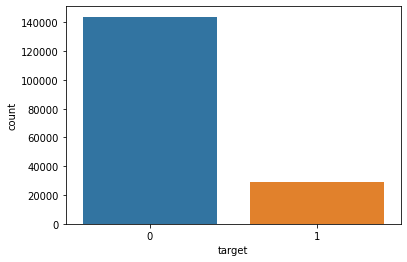

In [ ]:
sns.countplot(x=y_over)

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

x_uo, y_uo = RandomUnderSampler(sampling_strategy=0.33, random_state=42).fit_resample(x_over, y_over)

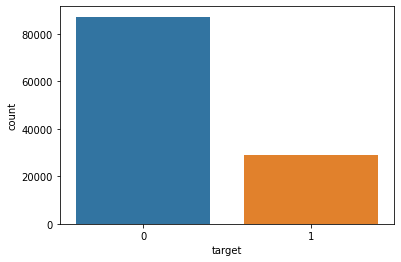

In [ ]:
sns.countplot(x=y_uo)

In [ ]:
len(x_uo), len(y_uo)

(116008, 116008)

# Training

모델
*   logistic regression
*   random forest
*   xgboost
*   lightgbm
*   naive bayes



gridsearch, randomsearch, optuna, ...



## 원본 데이터, 이상치 제거 데이터, 스케일링 적용 여부에 따른 성능 비교

원본 데이터

In [ ]:
x_raw = train.drop(['ID_code', 'target'], axis=1)
y_raw = train['target']

In [ ]:
from sklearn.model_selection import train_test_split

x_raw_tr, x_raw_te, y_raw_tr, y_raw_te = train_test_split(x_raw, y_raw, test_size=0.2, random_state=42)

원본 + 스케일링 데이터

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_raw_sc = scaler.fit_transform(x_raw)

In [ ]:
from sklearn.model_selection import train_test_split

x_rawsc_tr, x_rawsc_te, y_rawsc_tr, y_rawsc_te = train_test_split(x_raw_sc, y_raw, test_size=0.2, random_state=42)

이상치 제거 데이터

In [ ]:
x_out = rmout_train.drop(['ID_code', 'target'], axis=1)
y_out = rmout_train['target']

In [ ]:
x_out_tr, x_out_te, y_out_tr, y_out_te = train_test_split(x_out, y_out, test_size=0.2, random_state=42)

이상치 제거 + 스케일링 데이터

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_out_sc = scaler.fit_transform(x_out)

In [ ]:
x_outsc_tr, x_outsc_te, y_outsc_tr, y_outsc_te = train_test_split(x_out_sc, y_out, test_size=0.2, random_state=42)

logistic regression

In [ ]:
xtr = [x_raw_tr, x_rawsc_tr, x_out_tr, x_outsc_tr]
xte = [x_raw_te, x_rawsc_te, x_out_te, x_outsc_te]
ytr = [y_raw_tr, y_rawsc_tr, y_out_tr, y_outsc_tr]
yte = [y_raw_te, y_rawsc_te, y_out_te, y_outsc_te]

In [ ]:
from sklearn.linear_model import LogisticRegression

acclist = []

for i in range(4):
    lr = LogisticRegression(random_state=42).fit(xtr[i], ytr[i])
    acc = lr.score(xte[i], yte[i])
    acclist.append(acc)

acclist

[0.9121875, 0.914875, 0.9120514193893947, 0.9145152651312266]

이상치 제거 데이터보다 원본이 성능 좋음

스케일링 전보다는 후가 성능 좋음

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(x_rawsc_tr, y_rawsc_tr)
pred = lr.predict(x_rawsc_te)

print(f1_score(y_rawsc_te, pred))

0.40079190497140343


ramdom forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

acclist = []

for i in range(4):
    rf = RandomForestClassifier(max_depth=12, random_state=42).fit(xtr[i], ytr[i])
    acc = rf.score(xte[i], yte[i])
    acclist.append(acc)

acclist

[0.8998125, 0.8998125, 0.900017853954651, 0.900017853954651]

성능이 낮은 건 파라미터 튜닝을 대충해서 그런 듯

원본보다 이상치 제거 데이터가 성능이 더 좋음

스케일링에 따른 차이는 없음

## minmax sc VS standard sc

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_raw_ss = scaler.fit_transform(x_raw)

In [ ]:
x_rawss_tr, x_rawss_te, y_rawss_tr, y_rawss_te = train_test_split(x_raw_ss, y_raw, test_size=0.2, random_state=42)

In [ ]:
#순서대로 standard sc, minmax sc
xtr2 = [x_rawss_tr, x_rawsc_tr]
xte2 = [x_rawss_te, x_rawsc_te]
ytr2 = [y_rawss_tr, y_rawsc_tr]
yte2 = [y_rawss_te, y_rawsc_te]

logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

acclist = []

for i in range(2):
    lr = LogisticRegression(random_state=42).fit(xtr2[i], ytr2[i])
    acc = lr.score(xte2[i], yte2[i])
    acclist.append(acc)

acclist

[0.9148125, 0.914875]

standard sc보다 minmax가 성능이 좋음

## RFE (기여도 평가)

In [ ]:
from sklearn.feature_selection import RFE

model = LogisticRegression(random_state=42)
select_30features = RFE(model, n_features_to_select=30)
selector = select_30features.fit(x_raw_tr, y_raw_tr)
print(selector.score(x_raw_te, y_raw_te))

0.90071875


In [ ]:
selector.ranking_

array([ 16,  29,   6,  90,  51, 102,   1, 137,  81,   1, 159,  99,   1,
        28, 155,   1, 143, 161,  85, 140, 116,  68,   9,   1,  67,   1,
        38, 133,   1, 120, 167,  31,  33,  35,   1,  72,  26, 101, 149,
       138,  80, 169, 158,   1,  53, 152, 131, 151, 123, 103,  19, 119,
        84,   1, 130, 118,  45,   8,  78,  61, 129, 156,  58,  96,  74,
       112,   4,  75,  32, 139, 126,   1, 128, 150, 148,  73,  59, 124,
         3,  52,  66,   1, 117, 115, 141,  94,  88,  77,  49,  43, 134,
         1,  37,   1,  11,   1, 171, 146,  93,   1, 160, 145, 136, 132,
        25,   1,  15,  82, 154,  30,  17,   1,  27, 105,   1,  12,  22,
       168,  97,  64, 157,  10,  65,  70, 127,   1,  56,  24,  55, 147,
         1,   1,  18,   1, 122, 108, 165, 111, 104,  46, 100,  95, 114,
       110,   1,  47,   5,  86,   1,  98,  34,  71, 107, 170,  39,  63,
        36,  87, 162, 109, 166,   1,   2,  89,  60,  44,   1, 113,  76,
         1,  41, 125,  91,  62,  57,  50, 144,  20, 135,  13,  7

In [ ]:
rferank = selector.ranking_

In [ ]:
with open('rfe_rank.pkl', 'wb') as f:
    pickle.dump(rferank, f)

## PCA (차원 축소)

상관계수가 낮게 나타나서 차원 축소가 잘 안 먹힐 거 같다는 생각이...ㅠㅠ

pc 20개

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
x_rawpc = pca.fit_transform(x_raw_sc)
xpca = pd.DataFrame(data=x_rawpc)

In [ ]:
xpca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.012848,0.117294,0.209712,-0.276780,0.206215,0.074750,-0.099230,0.040357,0.014997,-0.082663,-0.059815,0.165634,0.064247,0.186986,-0.046976,0.057836,0.287303,0.184643,-0.161312,0.159337
1,-0.101983,0.277059,0.275693,0.427176,-0.104779,-0.161183,-0.036032,-0.066475,0.023312,-0.112068,-0.029696,0.289263,-0.199618,0.311575,-0.165779,-0.130278,0.133636,0.008556,0.113850,0.350267
2,-0.031222,-0.389971,0.076462,-0.054777,-0.129548,0.029502,0.246500,0.023342,-0.139587,0.159610,-0.233247,0.223047,0.026919,-0.248615,0.282325,0.274509,0.311164,0.076446,0.074528,0.219894
3,0.173643,0.051706,0.163137,-0.128340,0.033487,-0.200158,-0.004049,0.204327,-0.263937,0.055823,0.039826,0.153795,0.198812,0.006726,0.175982,0.141397,-0.066100,0.037949,0.004537,-0.132884
4,0.013842,0.049331,0.200805,-0.076062,0.323255,0.129241,-0.160857,0.049658,0.059707,-0.052755,0.275857,0.208334,-0.081882,-0.209060,-0.193260,0.128633,0.045904,0.007731,-0.044366,0.071269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,0.142309,0.251602,0.406070,-0.037063,0.036694,0.111567,0.050225,-0.190240,0.052744,-0.213464,-0.292652,0.071615,-0.084193,-0.030683,-0.246164,0.083121,0.320872,0.151662,-0.024394,-0.061649
159996,-0.003661,0.326577,-0.104083,-0.009608,-0.191030,0.010042,0.071240,0.219640,0.101148,0.060396,0.032269,-0.074300,-0.007585,-0.020513,-0.237105,0.034757,0.066568,0.239399,-0.156296,-0.209279
159997,0.017669,-0.010335,0.310048,0.263127,-0.013028,-0.016461,0.131520,-0.129040,0.208836,-0.359695,0.043073,0.087454,0.174904,0.077608,0.389344,0.089426,-0.396555,0.171491,-0.021983,0.170733
159998,0.064557,-0.233123,0.059618,-0.128766,0.135465,0.295642,-0.131818,0.072894,-0.358209,0.217170,-0.181330,-0.047631,0.207910,-0.093536,-0.009223,-0.080545,0.163038,0.070227,0.125783,0.225310


In [ ]:
from sklearn.model_selection import train_test_split

x_pca_tr, x_pca_te, y_pca_tr, y_pca_te = train_test_split(xpca, y_raw, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(x_pca_tr, y_pca_tr)
acc = lr.score(x_pca_te, y_pca_te)

print(acc)

0.90034375


pc 100개

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
x_rawpc = pca.fit_transform(x_raw_sc)
xpca = pd.DataFrame(data=x_rawpc)

In [ ]:
from sklearn.model_selection import train_test_split

x_pca_tr, x_pca_te, y_pca_tr, y_pca_te = train_test_split(xpca, y_raw, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(x_pca_tr, y_pca_tr)
acc = lr.score(x_pca_te, y_pca_te)

print(acc)

0.90875


pc 50개

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
x_rawpc = pca.fit_transform(x_raw_sc)
xpca = pd.DataFrame(data=x_rawpc)

from sklearn.model_selection import train_test_split

x_pca_tr, x_pca_te, y_pca_tr, y_pca_te = train_test_split(xpca, y_raw, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(x_pca_tr, y_pca_tr)
acc = lr.score(x_pca_te, y_pca_te)

print(acc)

0.9034375


## lightgbm (+증강데이터)

In [ ]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x_aug, y_aug, test_size=0.33, random_state=42)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
clf.fit(xtr, ytr)
valpred = clf.predict(xte)

print(clf.score(xte, yte))
print(f1_score(yte, valpred))

0.9264855935085758
0.8238171020455692


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = LGBMClassifier(n_estimators=500, num_leaves=64, n_jobs=-1, boost_from_average=False)
clf.fit(xtr, ytr)
valpred = clf.predict(xte)

print(clf.score(xte, yte))
print(f1_score(yte, valpred))

0.9177396627957826
0.7999527354366064


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = LGBMClassifier(n_estimators=500, num_leaves=31, n_jobs=-1, boost_from_average=False)
clf.fit(xtr, ytr)
valpred = clf.predict(xte)

print(clf.score(xte, yte))
print(f1_score(yte, valpred))

0.9055115559658585
0.7662660256410256


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = LGBMClassifier(n_estimators=200, n_jobs=-1, boost_from_average=False)
clf.fit(xtr, ytr)
valpred = clf.predict(xte)

print(clf.score(xte, yte))
print(f1_score(yte, valpred))

0.8870479244610725
0.6970723655633742


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

lr = LogisticRegression(random_state=42).fit(xtr, ytr)
valpred = lr.predict(xte)

print(lr.score(xte, yte))
print(f1_score(yte, valpred))

0.8387833438608425
0.5947068403908794


In [ ]:
from sklearn.model_selection import train_test_split

xtr2, xte2, ytr2, yte2 = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
#증강 전 데이터의 f1_score?
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(xtr2, ytr2)
valpred = lr.predict(xte2)

print(lr.score(xte2, yte2))
print(f1_score(yte2, valpred))

0.9128977272727272
0.3667905824039653


lightgbm의 boost_from_average 파라미터는 default가 true인데 클래스불균형이 심할 경우 모델의 roc 성능지표에 부정적 영향을 준다. false로 설정해야 불균형 시 분류 성능이 좋아짐.

증강 후 데이터가 증강 전보다 f1 score가 향상되었고, lr보다 light gbm의 성능이 훨씬 좋음.

## MLPclf

In [ ]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x_aug, y_aug, test_size=0.33, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = MLPClassifier(random_state=1, max_iter=300).fit(xtr, ytr) #활성화함수 relu / 오버샘플링 데이터
valpred = clf.predict(xte)

print(clf.score(xte, yte))
print(f1_score(yte, valpred))

0.8714024261859644
0.7144090353212


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = MLPClassifier(random_state=1, max_iter=300).fit(x_aug, y_aug) #활성화함수 relu / 오버샘플링 데이터
pred = clf.predict(testsc)

print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit.to_csv('0201_5_mlpf1best_aug.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

xtr2, xte2, ytr2, yte2 = train_test_split(x_und, y_und, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = MLPClassifier(random_state=1, max_iter=300).fit(xtr2, ytr2) #활성화함수 relu / 언더샘플링 데이터
valpred = clf.predict(xte2)

print(clf.score(xte2, yte2))
print(f1_score(yte2, valpred))

0.8380395571588506
0.5450733752620545


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

estimator = MLPClassifier(random_state=42)
f1 = make_scorer(f1_score, average='macro')

param_grid = {'activation' : ['relu', 'logistic'],
              'alpha' : [0.0001, 0.001, 0.01, 0.1]}

grid = GridSearchCV(estimator, param_grid=param_grid, scoring=f1)
grid.fit(xtr2, ytr2)

GridSearchCV(estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.8538841787258094
{'activation': 'relu', 'alpha': 0.1}


In [ ]:
best = grid.best_estimator_

#validation set에 대한 score
valpred = best.predict(xte2)
print(best.score(xte2, yte2))
print(f1_score(yte2, valpred))

0.8526558029605672
0.5713768771485436


## MLP gridsearch v2

In [ ]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x_uo, y_uo, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score

estimator = MLPClassifier(random_state=42, early_stopping=True, tol=1e-5)
f1 = make_scorer(f1_score , average='macro')

param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1]}

grid = GridSearchCV(estimator, param_grid=param_grid, scoring=f1)
grid.fit(xtr, ytr)

print(grid.best_score_)
print(grid.best_params_)

0.7490773785319289
{'alpha': 0.001}


In [ ]:
best = grid.best_estimator_

#validation set에 대한 score
valpred = best.predict(xte)
print(best.score(xte, yte))
print(f1_score(yte, valpred))

0.8399743445843021
0.6181122448979591


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = MLPClassifier(random_state=42, early_stopping=True, tol=1e-5, alpha=0.001)
clf.fit(x_uo, y_uo)

pred = clf.predict(testsc)

print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit['target'].value_counts()

0    35951
1     4049
Name: target, dtype: int64

In [ ]:
submit.to_csv('0202_3_mlpbest_uo.csv', index=False)

## logistic gridsearch v2

In [ ]:
C = np.logspace(-3, 3, 6)
C

array([1.00000000e-03, 1.58489319e-02, 2.51188643e-01, 3.98107171e+00,
       6.30957344e+01, 1.00000000e+03])

In [ ]:
C[4] > 10

True

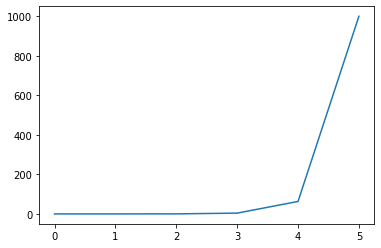

In [ ]:
plt.plot(C)

In [ ]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x_over, y_over, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer

estimator = LogisticRegression(random_state=42)
f1 = make_scorer(f1_score , average='macro')

param_grid = {'C':np.logspace(-3, 3, 6),
              'max_iter':[50, 100, 150, 200, 400],
              'class_weight':[None, {0:0.3, 1:0.7}, {0:0.1, 1:0.9}]}

grid = GridSearchCV(estimator, param_grid=param_grid, scoring=f1)
grid.fit(xtr, ytr)

print(grid.best_score_)
print(grid.best_params_)

0.7588605694427684
{'C': 0.015848931924611134, 'class_weight': {0: 0.3, 1: 0.7}, 'max_iter': 100}


In [ ]:
best = grid.best_estimator_

#validation set에 대한 score
valpred = best.predict(xte)
print(best.score(xte, yte))
print(f1_score(yte, valpred))

0.8201253583402167
0.6359882005899705


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01585, max_iter = 100, class_weight={0: 0.43, 1: 0.57},
                        random_state=42).fit(x_over, y_over)
pred = lr.predict(testsc)

print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit['target'].value_counts()

0    35711
1     4289
Name: target, dtype: int64

In [ ]:
submit.to_csv('0202_1_logbest_over.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

#랜덤오버+랜덤언더
xtr, xte, ytr, yte = train_test_split(x_uo, y_uo, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer

estimator = LogisticRegression(random_state=42)
f1 = make_scorer(f1_score , average='macro')

param_grid = {'C':np.logspace(-3, 3, 6),
              'max_iter':[50, 100, 150, 200, 400],
              'class_weight':[None, {0:0.45, 1:0.55}, {0:0.4, 1:0.6}]}

grid = GridSearchCV(estimator, param_grid=param_grid, scoring=f1)
grid.fit(xtr, ytr)

print(grid.best_score_)
print(grid.best_params_)

0.7632443202422884
{'C': 1000.0, 'class_weight': {0: 0.4, 1: 0.6}, 'max_iter': 100}


In [ ]:
best = grid.best_estimator_

#validation set에 대한 score
valpred = best.predict(xte)
print(best.score(xte, yte))
print(f1_score(yte, valpred))

0.8348699858360726
0.6231168039036291


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000, max_iter = 100, class_weight={0: 0.45, 1: 0.55},
                        random_state=42).fit(x_uo, y_uo)
pred = lr.predict(testsc)

print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit['target'].value_counts()

0    35177
1     4823
Name: target, dtype: int64

In [ ]:
submit.to_csv('0202_2_logbest_uo.csv', index=False)

## lgbm gridsearch

In [ ]:
from sklearn.model_selection import train_test_split

#랜덤오버+랜덤언더
xtr, xte, ytr, yte = train_test_split(x_uo, y_uo, test_size=0.3, random_state=42)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, reg_lambda=100)
clf.fit(xtr, ytr)
valpred = clf.predict(xte)

print(clf.score(xte, yte))
print(f1_score(yte, valpred))

0.9271493091744836
0.8311446977205152


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, f1_score

clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, reg_lambda=100)
clf.fit(x_uo, y_uo)
pred = clf.predict(testsc)

print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit['target'].value_counts()

0    37086
1     2914
Name: target, dtype: int64

In [ ]:
submit.to_csv('0202_3_lgbmbasic.csv', index=False)

In [ ]:
np.logspace(-2, 1, 4)

array([ 0.01,  0.1 ,  1.  , 10.  ])

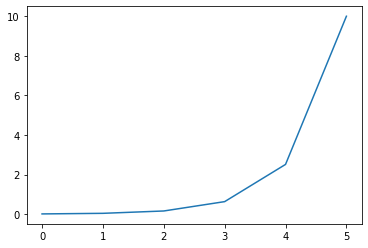

In [ ]:
plt.plot(np.logspace(-2, 1, 6))

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, f1_score

estimator = LGBMClassifier(n_jobs=-1, boost_from_average=False, random_state=42, n_estimators=1000)
f1 = make_scorer(f1_score , average='macro')

param_grid = {'num_leaves':[20, 31, 50, 80, 100],
              'min_child_samples':[10, 20],
              'reg_alpha': [0, 0.01, 10],
              'reg_lambda': [0, 0.01, 10],
              'learning_rate' : [0.01, 0.1]}

grid = GridSearchCV(estimator, param_grid=param_grid, scoring=f1, cv=5)
grid.fit(xtr, ytr)

## catboost

In [ ]:
from sklearn.model_selection import train_test_split

#랜덤오버+랜덤언더
xtr, xte, ytr, yte = train_test_split(x_aug, y_aug, test_size=0.3, random_state=202)

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 21.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, f1_score

clf = CatBoostClassifier(iterations=6000, learning_rate=0.1, max_depth=9, task_type='GPU',
                         custom_metric='F1', class_weights=[0.33, 0.67], verbose=0)
clf.fit(xtr, ytr)

valpred = clf.predict(xte)
print(clf.score(xte, yte))
print(f1_score(yte, valpred))

0.9248050644638308
0.7379959650302623


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, f1_score

clf = CatBoostClassifier(iterations=6000, learning_rate=0.1, max_depth=9, task_type='GPU',
                         custom_metric='F1', class_weights=[0.33, 0.67], verbose=0)
clf.fit(x_aug, y_aug)

pred = clf.predict(testsc)
print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit['target'].value_counts()

0    38254
1     1746
Name: target, dtype: int64

In [ ]:
submit.to_csv('0202_7_catover.csv', index=False)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, f1_score

clf = CatBoostClassifier(iterations=6000, learning_rate=0.1, depth=5, task_type='GPU', custom_metric='F1', class_weights=[0.33, 0.67])
clf.fit(xtr, ytr)

valpred = clf.predict(xte)
print(clf.score(xte, yte))
print(f1_score(yte, valpred))

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, f1_score

clf = CatBoostClassifier(iterations=6000, learning_rate=0.1, depth=5, task_type='GPU', custom_metric='F1', class_weights=[0.33, 0.67])
clf.fit(x_uo, y_uo)

pred = clf.predict(testsc)
print(pred)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1001:	learn: 0.3098420	total: 5.02s	remaining: 25s
1002:	learn: 0.3097707	total: 5.02s	remaining: 25s
1003:	learn: 0.3096640	total: 5.03s	remaining: 25s
1004:	learn: 0.3095552	total: 5.03s	remaining: 25s
1005:	learn: 0.3094528	total: 5.04s	remaining: 25s
1006:	learn: 0.3093509	total: 5.04s	remaining: 25s
1007:	learn: 0.3092469	total: 5.05s	remaining: 25s
1008:	learn: 0.3091374	total: 5.05s	remaining: 25s
1009:	learn: 0.3090403	total: 5.06s	remaining: 25s
1010:	learn: 0.3089589	total: 5.06s	remaining: 25s
1011:	learn: 0.3088579	total: 5.07s	remaining: 25s
1012:	learn: 0.3087541	total: 5.07s	remaining: 25s
1013:	learn: 0.3086593	total: 5.08s	remaining: 25s
1014:	learn: 0.3085761	total: 5.08s	remaining: 25s
1015:	learn: 0.3084747	total: 5.08s	remaining: 24.9s
1016:	learn: 0.3083759	total: 5.09s	remaining: 24.9s
1017:	learn: 0.3082683	total: 5.09s	remaining: 24.9s
1018:	learn: 0.3081502	total: 5.1s	remaining: 24.9s
1019:	learn: 0.3080399	total: 5.1s	rema

In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit['target'].value_counts()

0    35450
1     4550
Name: target, dtype: int64

In [ ]:
submit.to_csv('0202_4_catbasic.csv', index=False)

## catboost optuna

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 22.1 MB/s eta 0:00:00


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 12.2 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

#랜덤오버+랜덤언더
xtr, xte, ytr, yte = train_test_split(x_over, y_over, test_size=0.3, random_state=202)

In [ ]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 2, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1, 10)
    iterations = trial.suggest_int('iterations', 1000, 7000)
    border_count = trial.suggest_int('border_count', 32, 128)
    #scale_pos_weight = trial.suggest_float('scale_pos_weight', 1, 4)
    #sampling_frequency = trial.suggest_int('sampling_frequency', 0, 1)
    #random_strength = trial.suggest_float('random_strength', 0.001, 1)
    #rsm = trial.suggest_float('rsm', 0, 1)
    
    model = CatBoostClassifier(max_depth=max_depth,
                               learning_rate=learning_rate,
                               l2_leaf_reg=l2_leaf_reg,
                               iterations=iterations,
                               border_count=border_count,
                               #scale_pos_weight=scale_pos_weight,
                               #sampling_frequency=sampling_frequency,
                               random_strength=0.6, class_weights=[0.3, 0.7],
                               task_type='GPU', custom_metric='F1', verbose=0, random_state=42)
    # Fit the model with training data
    model.fit(xtr, ytr)
    
    # Evaluate the model with validation data
    y_pred = model.predict(xte)
    f1 = f1_score(yte, y_pred)
    
    return f1  # minimize 1 - accuracy as the objective

In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

study = optuna.create_study(direction='maximize', study_name='class_imbalanced_dataset')
study.optimize(objective, n_trials=20)

best_params = study.best_params

[I 2023-02-02 14:15:56,803] A new study created in memory with name: class_imbalanced_dataset
[I 2023-02-02 14:16:25,854] Trial 0 finished with value: 0.7945652173913043 and parameters: {'max_depth': 3, 'learning_rate': 0.1318168879247588, 'l2_leaf_reg': 2.7086659450022452, 'iterations': 4862, 'border_count': 100}. Best is trial 0 with value: 0.7945652173913043.
[I 2023-02-02 14:20:14,455] Trial 1 finished with value: 0.9091559939543393 and parameters: {'max_depth': 12, 'learning_rate': 0.47103193408566185, 'l2_leaf_reg': 2.5522623300263243, 'iterations': 4071, 'border_count': 66}. Best is trial 1 with value: 0.9091559939543393.
[I 2023-02-02 14:20:38,204] Trial 2 finished with value: 0.8919000301114123 and parameters: {'max_depth': 8, 'learning_rate': 0.1435161195889772, 'l2_leaf_reg': 8.197519079200887, 'iterations': 1786, 'border_count': 44}. Best is trial 1 with value: 0.9091559939543393.
[I 2023-02-02 14:22:08,617] Trial 3 finished with value: 0.9095308719069549 and parameters: {'

KeyboardInterrupt: ignored

### 랜덤언더+랜덤오버

n_est 3000~8000으로 돌렸던 것 best

'max_depth': 10, 'learning_rate': 0.08235792228356686, 'l2_leaf_reg': 2.9400376745924923, 'iterations': 4996, 'scale_pos_weight': 3.2569675711423463, 'random_strength': 0.8500200339007988

'max_depth': 9, 'learning_rate': 0.15554885001530822, 'l2_leaf_reg': 7.888110084778167, 'iterations': 5896, 'border_count': 76, 'scale_pos_weight': 3.305129797063949, 'random_strength': 0.5489695641822077

(0.06718404258730715, 0.8455584224106155)

'max_depth': 8, 'learning_rate': 0.17405923115164929, 'l2_leaf_reg': 7.06425663532763, 'iterations': 4635, 'border_count': 97, 'scale_pos_weight': 1.4315714931083645, 'random_strength': 0.38476256495732974

(0.0678574864509508, 0.8439067571555031)

{'max_depth': 8, 'learning_rate': 0.05860911639338758, 'l2_leaf_reg': 4.234764118876605, 'iterations': 5189, 'border_count': 90, 'scale_pos_weight': 1.7746063759534658, 'random_strength': 0.7356636595028698}

(0.06705576756566078, 0.8468692786525083)

{'max_depth': 8, 'learning_rate': 0.25566039504325017, 'l2_leaf_reg': 4.493939876149055, 'iterations': 3903, 'border_count': 117, 'scale_pos_weight': 1.9586008667240962, 'random_strength': 0.44181496693300515}

(0.06949299297694256, 0.8410241361602231).

 {'max_depth': 9, 'learning_rate': 0.3140458428629067, 'l2_leaf_reg': 6.834161298293307, 'iterations': 5817, 'border_count': 103, 'scale_pos_weight': 3.1499266484530026, 'random_strength': 0.12969868819666688}

 (0.06933264919988458, 0.8413560316994424)

### 원본 스케일링

{'max_depth': 5, 'learning_rate': 0.1230638051521326, 'l2_leaf_reg': 9.3260001597818, 'iterations': 1285, 'border_count': 93, 'scale_pos_weight': 2.505398096895407, 'random_strength': 0.9468301203534331}

(0.08157499999999995, 0.552216275559215).

{'max_depth': 5, 'learning_rate': 0.05397507797513118, 'l2_leaf_reg': 2.4927617186862348, 'iterations': 5346, 'border_count': 55, 'scale_pos_weight': 2.9513898637122313, 'random_strength': 0.6353372077568247}

(0.08297500000000002, 0.5511832319134551)

{'max_depth': 5, 'learning_rate': 0.23123173127083665, 'l2_leaf_reg': 2.4167842844817575, 'iterations': 3592, 'border_count': 86, 'scale_pos_weight': 3.8034763052683305, 'random_strength': 0.44378785683856053} 

(0.08342499999999997, 0.5288719469151489)

{'max_depth': 3, 'learning_rate': 0.3259256393714431, 'l2_leaf_reg': 1.8242676953499135, 'iterations': 1762, 'border_count': 63, 'scale_pos_weight': 2.5973029874441074, 'random_strength': 0.4371157058366432}  

(0.08877500000000005, 0.5432797427652732)

### smote + 랜덤언더

{'max_depth': 10, 'learning_rate': 0.23007399369561785, 'l2_leaf_reg': 6.034996432777826, 'iterations': 4380, 'border_count': 69, 'scale_pos_weight': 3.3524644022914245, 'random_strength': 0.6061213384006146} 

(0.09572523490363338, 0.7707197173362009).

{'max_depth': 10, 'learning_rate': 0.22542980069336366, 'l2_leaf_reg': 7.434418235072107, 'iterations': 3601, 'border_count': 63, 'scale_pos_weight': 1.9857580151657401, 'random_strength': 0.509182886660437} 

(0.09431420966552284, 0.7701086531697022)

{'max_depth': 8, 'learning_rate': 0.41998000608618047, 'l2_leaf_reg': 7.033132189470443, 'iterations': 5630, 'border_count': 96, 'scale_pos_weight': 2.8669459164231132, 'random_strength': 0.9814355997698511} 

(0.09780970400538758, 0.7719796650717703)

{'max_depth': 9, 'learning_rate': 0.06374830594616396, 'l2_leaf_reg': 2.255839949870669, 'iterations': 5836, 'border_count': 122, 'scale_pos_weight': 3.1332227821742435, 'random_strength': 0.3663551319505632} 

(0.09562902863739853, 0.7699784017278617)

{'max_depth': 9, 'learning_rate': 0.2736966856796258, 'l2_leaf_reg': 6.221731477675253, 'iterations': 5861, 'border_count': 91, 'scale_pos_weight': 1.0658395258617837, 'random_strength': 0.7694505899258671} 

(0.09354455953564444, 0.7735072598804255)

{'max_depth': 7, 'learning_rate': 0.2608160500240545, 'l2_leaf_reg': 2.772055625056566, 'iterations': 5496, 'border_count': 43, 'scale_pos_weight': 2.065802896679445, 'random_strength': 0.6463120973642356} 

(0.0965269537889234, 0.7722802239370555)

{'max_depth': 10, 'learning_rate': 0.14706437562024705, 'l2_leaf_reg': 5.144411801501621, 'iterations': 4946, 'border_count': 50, 'scale_pos_weight': 3.6871765516855337, 'random_strength': 0.11240948945770214}

(0.09588557868069136, 0.7696810969034047).

### pred

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, f1_score

clf = CatBoostClassifier(iterations=2897, learning_rate=0.082, max_depth=13, task_type='GPU', custom_metric='F1',
                         l2_leaf_reg=6.07, random_strength=0.6, border_count=55, verbose=0,
                         class_weights=[0.3, 0.7], random_state=42)
clf.fit(x_over, y_over)

pred = clf.predict(testsc)
print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit['target'].value_counts()

0    39014
1      986
Name: target, dtype: int64

In [ ]:
submit.to_csv('0202_4_catraw.csv', index=False)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, f1_score

clf = CatBoostClassifier(iterations=5000, learning_rate=0.09, max_depth=10, task_type='GPU', custom_metric='F1',
                         l2_leaf_reg=6, scale_pos_weight=2, random_strength=)
clf.fit(x_uo, y_uo)

pred = clf.predict(testsc)
print(pred)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1:	learn: 0.6713320	total: 52.8ms	remaining: 2m 12s
2:	learn: 0.6624306	total: 79.6ms	remaining: 2m 12s
3:	learn: 0.6543458	total: 104ms	remaining: 2m 9s
4:	learn: 0.6468738	total: 129ms	remaining: 2m 8s
5:	learn: 0.6396026	total: 151ms	remaining: 2m 5s
6:	learn: 0.6330804	total: 171ms	remaining: 2m 1s
7:	learn: 0.6271318	total: 191ms	remaining: 1m 59s
8:	learn: 0.6212963	total: 211ms	remaining: 1m 57s
9:	learn: 0.6157840	total: 232ms	remaining: 1m 55s
10:	learn: 0.6105518	total: 253ms	remaining: 1m 54s
11:	learn: 0.6055285	total: 273ms	remaining: 1m 53s
12:	learn: 0.6004991	total: 294ms	remaining: 1m 52s
13:	learn: 0.5960864	total: 314ms	remaining: 1m 51s
14:	learn: 0.5917323	total: 335ms	remaining: 1m 51s
15:	learn: 0.5868583	total: 356ms	remaining: 1m 50s
16:	learn: 0.5828716	total: 376ms	remaining: 1m 50s
17:	learn: 0.5787032	total: 396ms	remaining: 1m 49s
18:	learn: 0.5748970	total: 417ms	remaining: 1m 49s
19:	learn: 0.5709055	total: 437ms	remai

In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit['target'].value_counts()

0    37726
1     2274
Name: target, dtype: int64

# Pred

## logistic reg + minmax sc + 원본데이터 전체피처

In [ ]:
x_raw = train.drop(['ID_code', 'target'], axis=1)
y_raw = train['target']

In [ ]:
test.drop('ID_code', axis=1, inplace=True)
test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.7757,6.7905,9.2920,4.8443,10.8877,3.5858,4.7267,14.1264,1.9131,7.1682,...,4.8996,4.4960,2.0201,5.0578,18.7864,-0.2550,4.0958,7.9291,17.6055,-7.4019
1,7.5491,-8.4764,15.4626,3.6803,12.1527,-7.1858,5.1952,13.7568,2.5632,8.1126,...,10.2822,11.9053,3.0869,-0.6879,22.3453,-2.1595,4.1147,9.2685,12.2069,1.3086
2,5.8385,-6.9177,8.1589,6.7591,9.0635,4.9003,4.7126,21.1854,-3.5385,8.3261,...,0.0732,10.2627,-0.3105,6.8481,15.2119,-0.5050,1.8873,8.6977,18.6569,11.5001
3,15.6901,-7.7904,8.3676,6.3246,9.8144,6.9361,4.5284,11.7888,3.3775,8.8897,...,11.8331,4.3828,2.9730,2.4989,18.6336,1.0621,-3.8953,8.7950,12.9313,-3.1393
4,15.5726,-6.6387,12.0251,7.2093,10.3838,-8.9961,4.8868,18.8259,-5.2734,7.3476,...,7.9042,10.4118,3.3438,0.4358,16.0511,0.7758,-3.3334,7.7918,18.2619,-3.2074


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_raw)
x_sc = scaler.transform(x_raw)
test_sc = scaler.transform(test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(x_sc, y_raw)
pred = lr.predict(test_sc)

print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit.to_csv('0130_1_lr_mmsc.csv', index=False)

## 이상치 제거 + minmax sc + rfe(100) + lr

In [ ]:
x = rmout_train.drop(['ID_code', 'target'], axis=1)
y = rmout_train['target']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
x_out_mm = scaler.transform(x)
test_sc = scaler.transform(test)

In [ ]:
from sklearn.feature_selection import RFE

model = LogisticRegression(random_state=42)
select_100features = RFE(model, n_features_to_select=100)
selector = select_100features.fit(x_out_mm, y)

pred = selector.predict(test_sc)

print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit.to_csv('0130_2_lr_mm_out_rfe.csv', index=False)

## 이상치 제거 + mm + lr

In [ ]:
x = rmout_train.drop(['ID_code', 'target'], axis=1)
y = rmout_train['target']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
x_out_mm = scaler.transform(x)
test_sc = scaler.transform(test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(x_out_mm, y)
pred = lr.predict(test_sc)

print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit.to_csv('0130_3_lr_out_mm.csv', index=False)

## 증강 + lgbm

In [ ]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x_aug, y_aug, test_size=0.33, random_state=42)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = LGBMClassifier(n_estimators=1000, num_leaves=80, reg_alpha=0.03,
                     n_jobs=-1, boost_from_average=False)
clf.fit(xtr, ytr)
valpred = clf.predict(xte)

print(clf.score(xte, yte))
print(f1_score(yte, valpred))

0.9293199229062404
0.8307214895267648


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf2 = LGBMClassifier(n_estimators=1000, num_leaves=80, reg_alpha=0.05,
                     n_jobs=-1, boost_from_average=False)
clf2.fit(xtr, ytr)
valpred2 = clf2.predict(xte)

print(clf2.score(xte, yte))
print(f1_score(yte, valpred2))

0.9283481528270411
0.8284473398479913


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf3 = LGBMClassifier(n_estimators=1000, num_leaves=80, reg_alpha=0.1,
                     n_jobs=-1, boost_from_average=False)
clf3.fit(xtr, ytr)
valpred3 = clf3.predict(xte)

print(clf3.score(xte, yte))
print(f1_score(yte, valpred3))

0.9286720761867742
0.8294609665427509


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf4 = LGBMClassifier(n_estimators=1000, num_leaves=60,
                     n_jobs=-1, boost_from_average=False)
clf4.fit(xtr, ytr)
valpred4 = clf4.predict(xte)

print(clf4.score(xte, yte))
print(f1_score(yte, valpred4))

0.9248497805419238
0.8199736168231552


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = LGBMClassifier(n_estimators=1000, num_leaves=80, reg_alpha=0.03,
                     n_jobs=-1, boost_from_average=False)
clf.fit(x_aug, y_aug)
pred = clf.predict(testsc)

print(pred)

[0 0 0 ... 0 1 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,1


In [ ]:
submit.to_csv('0131_1_aug_lgbm.csv', index=False)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = LGBMClassifier(n_estimators=200, n_jobs=-1, boost_from_average=False)
clf.fit(x_aug, y_aug)
pred = clf.predict(testsc)

print(pred)

[0 0 0 ... 0 1 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,1


In [ ]:
submit.to_csv('0131_4_aug_lgbm200.csv', index=False)

## 원본 + lgbm

In [ ]:
x = train.drop(['ID_code', 'target'], axis=1)
y = train['target']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
xsc = scaler.transform(x)
testsc = scaler.transform(test)

In [ ]:
from sklearn.model_selection import train_test_split

xtr2, xte2, ytr2, yte2 = train_test_split(xsc, y, test_size=0.33, random_state=42)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = LGBMClassifier(n_estimators=1000, num_leaves=80, reg_alpha=0.03,
                     n_jobs=-1, boost_from_average=False)
clf.fit(xtr2, ytr2)
valpred = clf.predict(xte2)

print(clf.score(xte2, yte2))
print(f1_score(yte2, valpred))

0.9180113636363636
0.367382726874178


## 증강 + log reg

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(x_aug, y_aug)
pred = lr.predict(testsc)

print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit.to_csv('0131_2_aug_logisticreg.csv', index=False)

## 증강 0.7 + logistic reg

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(x_aug2, y_aug2)
pred = lr.predict(testsc)

print(pred)

[0 0 0 ... 0 1 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,1


In [ ]:
submit.to_csv('0131_3_aug2_logisticreg.csv', index=False)

## LGBM gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

estimator = LGBMClassifier(n_jobs=-1, boost_from_average=False, random_state=42)

param_grid = {'num_leaves':[20, 31, 50],
              'min_child_samples':[10, 20],
              'reg_alpha': [0, 0.01, 0.05],
              'n_estimators': [100, 500, 1000]}

grid = GridSearchCV(estimator, param_grid=param_grid)
grid.fit(xtr, ytr)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
best_lgbm = grid.best_estimator_

#validation set에 대한 score
valpred = best_lgbm.predict(xte)
print(best_lgbm.score(xte, yte))
print(f1_score(yte, valpred))

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = LGBMClassifier(n_estimators=1000, num_leaves=50, reg_alpha=0.01, min_child_samples=20,
                     n_jobs=-1, boost_from_average=False)
clf.fit(x_aug, y_aug)
pred = clf.predict(testsc)

print(pred)

[0 0 0 ... 0 1 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,1


In [ ]:
submit.to_csv('0131_5_lgbmbest.csv', index=False)

## logistic reg gridsearch

In [ ]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x_aug, y_aug, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

xtr2, xte2, ytr2, yte2 = train_test_split(x_und, y_und, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer

estimator = LogisticRegression(random_state=42)

param_grid = {'C':[0.01, 0.1, 1, 5, 10, 30],
              'max_iter':[50, 100, 150, 200, 400],
              'class_weight':[None, {0:0.3, 1:0.7}, {0:0.1, 1:0.9}]}

grid = GridSearchCV(estimator, param_grid=param_grid)
grid.fit(xtr2, ytr2)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 30],
                         'class_weight': [None, {0: 0.3, 1: 0.7},
                                          {0: 0.1, 1: 0.9}],
                         'max_iter': [50, 100, 150, 200, 400]})

In [ ]:
#증강데이터
print(grid.best_score_)
print(grid.best_params_)

0.8400622232858682
{'C': 1, 'class_weight': None, 'max_iter': 100}


In [ ]:
#증강데이터
best_logreg = grid.best_estimator_

#validation set에 대한 score
valpred = best_logreg.predict(xte)
print(best_logreg.score(xte, yte))
print(f1_score(yte, valpred))

0.8387833438608425
0.5947068403908794


In [ ]:
#언더샘플링
print(grid.best_score_)
print(grid.best_params_)

0.8313432092364541
{'C': 0.1, 'class_weight': None, 'max_iter': 50}


In [ ]:
#언더샘플링
best_logreg = grid.best_estimator_

#validation set에 대한 score
valpred = best_logreg.predict(xte2)
print(best_logreg.score(xte2, yte2))
print(f1_score(yte2, valpred))

0.8337191358024691
0.6045145898329969


In [ ]:
lr = LogisticRegression(class_weight={0: 0.3, 1: 0.7}, random_state=42).fit(xtr, ytr)

valpred = lr.predict(xte)
print(lr.score(xte, yte))
print(f1_score(yte, valpred))

0.8162058856874463
0.6451975987993998


In [ ]:
lr = LogisticRegression(class_weight={0: 0.1, 1: 0.9}, random_state=42).fit(xtr, ytr)

valpred = lr.predict(xte)
print(lr.score(xte, yte))
print(f1_score(yte, valpred))

0.6625204476620832
0.5593503499904836


In [ ]:
lr = LogisticRegression(class_weight={0: 0.35, 1: 0.65}, random_state=42).fit(xtr, ytr)

valpred = lr.predict(xte)
print(lr.score(xte, yte))
print(f1_score(yte, valpred))

0.8283854040134104
0.6443579244143116


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight={0: 0.3, 1: 0.7}, random_state=42).fit(x_aug, y_aug)
pred = lr.predict(testsc)

print(pred)

[0 0 0 ... 0 1 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,1


In [ ]:
submit.to_csv('0201_1_wlogistic.csv', index=False)

## MLP girdsearch

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = MLPClassifier(alpha=0.1, random_state=42).fit(x_und, y_und)
pred = clf.predict(testsc)

print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit.to_csv('0201_2_mlpbest_und.csv', index=False)

## logistic best+ und

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.1, max_iter = 50, random_state=42).fit(x_und, y_und)
pred = lr.predict(testsc)

print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,0


In [ ]:
submit.to_csv('0201_3_logbest_und.csv', index=False)

## metric 바꾼 logistic gscv

In [ ]:
from sklearn.model_selection import train_test_split

xtr2, xte2, ytr2, yte2 = train_test_split(x_und, y_und, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer

estimator = LogisticRegression(random_state=42)
f1 = make_scorer(f1_score)

param_grid = {'C':[0.01, 0.1, 1, 5, 10, 30],
              'max_iter':[50, 100, 150, 200, 400],
              'class_weight':[None, {0:0.3, 1:0.7}, {0:0.1, 1:0.9}]}

grid = GridSearchCV(estimator, param_grid=param_grid, scoring=f1)
grid.fit(xtr2, ytr2)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 30],
                         'class_weight': [None, {0: 0.3, 1: 0.7},
                                          {0: 0.1, 1: 0.9}],
                         'max_iter': [50, 100, 150, 200, 400]},
             scoring=make_scorer(f1_score))

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.6096254960504528
{'C': 30, 'class_weight': {0: 0.3, 1: 0.7}, 'max_iter': 100}


In [ ]:
best_logreg = grid.best_estimator_

#validation set에 대한 score
valpred = best_logreg.predict(xte2)
print(best_logreg.score(xte2, yte2))
print(f1_score(yte2, valpred))

0.8306381390720239
0.6133749822518814


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=30, max_iter = 100, class_weight={0: 0.3, 1: 0.7},
                        random_state=42).fit(x_und, y_und)
pred = lr.predict(testsc)

print(pred)

[0 0 0 ... 0 1 0]


In [ ]:
submit['target'] = pred
submit

,ID_code,target
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0
...,...,...
39995,test_39996,0
39996,test_39997,0
39997,test_39998,0
39998,test_39999,1


In [ ]:
submit.to_csv('0201_4_logf1best_und.csv', index=False)